## Houston - House Price Index vs Energy Industry
----

### Analysis
* This study shall focus on the correlation between fluctuations in oil and gas prices and the strength of the correlation with house prices in Houston.
* Houston is the oil and gas capital of the USA - and it would be interesting to investigate the impact of oil prices on the local economy with respect to the housing market.
* In addition to focussing on the city of Houston, other major cities in Texas, such as Dallas and Austin shall be used to confirm the strength of the impact emanating from the energy industry.
* A comparison of the labor market involved in the oil/gas sector by each of the cities is a good starting point on which to base the argument.

---

#### Note
* The FRED API shall be utilized for gathering the data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json

# Import API key
import config
from config import api_key

# Output File (CSV)
output_data_file = "output_data/quarter_data.csv"
output_data_file_2 = "output_data/annual_data.csv"

In [2]:
# New Dependency! Use this to pretty print the JSON
# https://docs.python.org/3/library/pprint.html
from pprint import pprint

In [3]:
# The URL for the FRED API
base = 'https://api.stlouisfed.org/fred/series/observations?series_id='

# List of FRED series IDs and their description
q_dict = {'ATNHPIUS26420Q': 'House Price Index for Houston',
          'HOUS448UR':'Unemployment Rate in Houston',
          #Thousands of Persons (monthly), 
           'SMU48264201000000001SA': 'Mining and Logging',
           'HOUS448MFG': 'Manufacturing',
           'HOUS448TRAD': 'Trade, Transportation, and Utilities',
           'HOUS448FIRE': 'Financial Activities',
           'HOUS448PBSV': 'Professional and Business Services',
           'HOUS448EDUH': 'Education and Health Services',          
           'HOUS448LEIH': 'Leisure and Hospitality',
           'HOUS448GOVT': 'Government',
           'SMU48264201021100001SA':'Oil and Gas Extraction',
           'SMU48264202000000001SA':'Construction in Houston',
           #Dollars (monthly)
           'WTISPLC': 'Global price of WTI Crude',
           #Percent (monthly)
           'MORTGAGE30US': '30Yr Fixed Mortgage Rate',
           #CPI (monthly)
           'CUURA318SA0':'CPI for Houston'
          }

# Include start date, API key from config.py file and file type json
start_date = '1990-01-01'
s_dates = '&observation_start={}'.format(start_date)
end_date = '2017-01-01'
e_dates = '&observation_end={}'.format(end_date)

api_key = '&api_key={}'.format(config.api_key)

ftype = '&file_type=json'
frequency = 'a'
freq = '&frequency={}'.format(frequency)
#aggregation = 'eop'
#agg = '&aggregation_method={}'.format(aggregation)

In [4]:
df = pd.DataFrame()
for code, name in q_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base, code, s_dates,e_dates, api_key, ftype,freq)
    r = requests.get(url).json()['observations']
    df[name] = [i['value'] for i in r]
df.index = pd.to_datetime([i['date'] for i in r])
df.head()
df.to_csv('output_data/general.csv')
len(df)

28

In [5]:
# List of FRED series IDs and their description
a_dict = {#'HOUS448PCPI':'Per Capita Personal Income - Houston',#2001 (annual)
          # 
          # Population and Unemployment is annual only
           'TXHARR1POP':'Population in Harris County',
           'TXFORT5POP':'Population in Fort Bend County',
           'TXMONT0POP':'Population in Montgomery County',
           'TXGALV7POP':'Population in Galveston County',
           'TXBRAZ0POP':'Population in Brazoria County',
           'TXLIBE1POP':'Population in Liberty County',
           'TXWALL3POP':'Population in Waller County',
           'TXCHAM1POP':'Population in Chambers County',
           'TXAUST5POP':'Population in Austin County'
           }

# Include start date, API key from config.py file and file type json
start_date = '1990-01-01'
s_dates = '&observation_start={}'.format(start_date)
end_date = '2017-01-01'
e_dates = '&observation_end={}'.format(end_date)
api_key = '&api_key={}'.format(config.api_key)
ftype = '&file_type=json'
frequency = 'a'
freq = '&frequency={}'.format(frequency)
#aggregation = 'eop'
#agg = '&aggregation_method={}'.format(aggregation)

In [6]:
dff = pd.DataFrame()
for code, name in a_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base, code, s_dates,e_dates, api_key, ftype,freq)
    r = requests.get(url).json()['observations']
    dff[name] = [i['value'] for i in r]
dff.index = pd.to_datetime([i['date'] for i in r])
dff.to_csv('output_data/population.csv')
dff.head()
len(dff)

28

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### House Price Index vs. Oil Price

In [7]:
x1_axis = df.index.values
x2_axis =dff.index.values

In [8]:
df.dtypes
cols = df.columns[df.dtypes.eq(object)]
cols
for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df.dtypes

House Price Index for Houston           float64
Unemployment Rate in Houston            float64
Mining and Logging                      float64
Manufacturing                           float64
Trade, Transportation, and Utilities    float64
Financial Activities                    float64
Professional and Business Services      float64
Education and Health Services           float64
Leisure and Hospitality                 float64
Government                              float64
Oil and Gas Extraction                  float64
Construction in Houston                 float64
Global price of WTI Crude               float64
30Yr Fixed Mortgage Rate                float64
CPI for Houston                         float64
dtype: object

In [9]:
dff.dtypes
cols = dff.columns[dff.dtypes.eq(object)]
cols
for d in cols:
    dff[d] = pd.to_numeric(dff[d], errors='coerce')
dff.dtypes

Population in Harris County        float64
Population in Fort Bend County     float64
Population in Montgomery County    float64
Population in Galveston County     float64
Population in Brazoria County      float64
Population in Liberty County       float64
Population in Waller County        float64
Population in Chambers County      float64
Population in Austin County        float64
dtype: object

In [10]:
df.to_csv(output_data_file)
dff.to_csv(output_data_file_2)

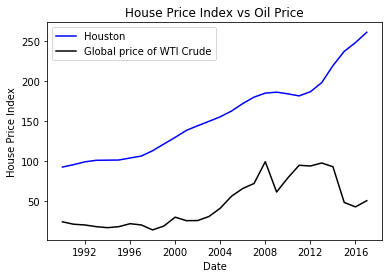

In [11]:
x1_axis = df.index.values

#plt.plot(x_axis, y_axis)
plt.plot(x1_axis, df["House Price Index for Houston"],color="blue", label="Houston" )
plt.plot(x1_axis, df["Global price of WTI Crude"],color='black')

plt.legend(loc="best")

plt.title(f"House Price Index vs Oil Price")
plt.ylabel("House Price Index")
plt.xlabel("Date")

#plt.savefig("Latitude_v_MaxTemp.png")
plt.savefig("output_plot/House price Index vs WTI Oil Price.png")
plt.show()

In [12]:
#df['MA'] = df.rolling(window=3)["Global price of WTI Crude"].mean()
#df.head()

KeyError: 'MA'

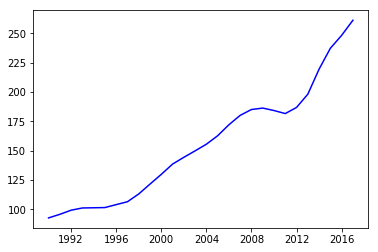

In [13]:
plt.plot(x1_axis, df["House Price Index for Houston"],color="blue", label="Houston Price Index" )
plt.plot(x1_axis, df["MA"],color='black',label = "Moving Average WTI Crude")

plt.legend(loc="best")

plt.title(f"House Price Index vs Oil Price")
plt.ylabel("House Price Index")
plt.xlabel("Date")

plt.savefig("output_plot/House price Index vs MA WTA Oil Price.png")
plt.show()


In [ ]:
plt.plot(x1_axis, df["House Price Index for Houston"],color="blue", label="Houston Price Index" )
plt.plot(x1_axis, df["Construction in Houston"],color="green", label="Construction" )
plt.plot(x1_axis, df["Education and Health Services"],color="orange", label="Education-Health" )
plt.plot(x1_axis, df["Trade, Transportation, and Utilities"],color="brown", label="TTU" )
plt.plot(x1_axis, df["Mining and Logging"],color="purple", label="Mining and Logging" )
plt.plot(x1_axis, df["Manufacturing"],color="red", label="Manufacturing" )
plt.plot(x1_axis, df["Oil and Gas Extraction"],color="black", label="Oil and Gas Extraction" )

plt.legend(loc="best")

plt.title(f"House Price Index vs Industry Employment")
plt.ylabel("House Price Index")
plt.xlabel("Date")

plt.savefig("output_plot/House Price Index vs Industry Employment")
plt.show()

In [ ]:
plt.plot(x1_axis, df["House Price Index for Houston"],color="blue", label="Houston Price Index" )
plt.plot(x1_axis, df["30Yr Fixed Mortgage Rate"],color="green", label="Mortgage Rate" )
plt.plot(x1_axis, df["CPI for Houston"],color="orange", label="CPI for Houston" )

plt.legend(loc="best")

plt.title(f"HPI vs Mortagage vs CPI")
plt.ylabel("TBD")
plt.xlabel("Date")

plt.savefig("output_plot/HPI vs Mortagage vs CPI")
plt.show()

In [ ]:
dff.head()

In [ ]:
dff.columns
dff['Houston_Population']=dff['Population in Harris County']\
                        +dff['Population in Fort Bend County']\
                        +dff['Population in Montgomery County']\
+dff['Population in Galveston County']\
+dff['Population in Brazoria County']\
+dff['Population in Liberty County']\
+dff['Population in Waller County']\
+dff['Population in Chambers County']\
+dff['Population in Austin County']


dff['Difference'] = dff['Houston_Population'].diff()

dff.head()

In [ ]:
df["Houston_Population"] = dff['Difference']
df.to_csv('output_data/Houston_df.csv')
df.head()

In [ ]:
x2_axis =dff.index.values
plt.plot(x2_axis, dff["Houston_Population"],color="red", label="Houston Population" )
plt.plot(x1_axis, df["House Price Index for Houston"].values*20,color="blue", label="Houston Price Index" )
plt.legend(loc="best")

plt.title(f"Houston Population")
plt.ylabel("Thousands")
plt.xlabel("Year")

plt.savefig("Houston Population")
plt.show()

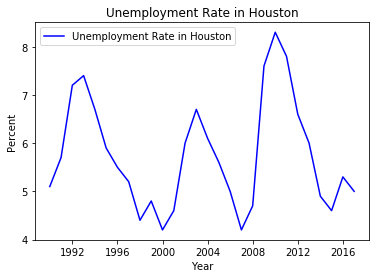

In [22]:
plt.plot(x1_axis, df["Unemployment Rate in Houston"],color="blue", label="Unemployment Rate in Houston" )

plt.legend(loc="best")

plt.title(f"Unemployment Rate in Houston")
plt.ylabel("Percent")
plt.xlabel("Year")

plt.savefig("output_data/Unemployment Rate in Houston")
plt.show()